# 线性回归

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [55]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

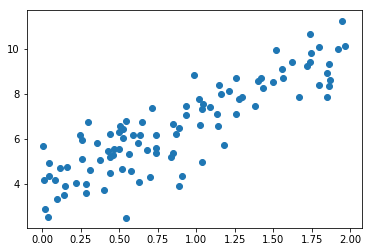

In [56]:
plt.scatter(X,y)
plt.show()

## 正规方程  

$\hat{\theta}=\left(\mathbf{X}^{T} \cdot \mathbf{X}\right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}$

In [57]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[3.85939249],
       [3.03213772]])

可以看到参数和我们设置生成数据的参数差别不大

In [58]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b @ theta_best
y_predict

array([[3.85939249],
       [9.92366794]])

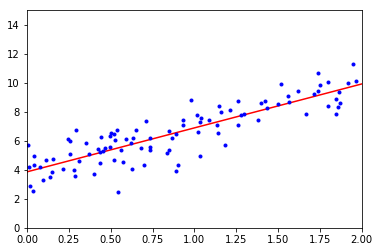

In [59]:
plt.plot(x_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [60]:
#使用sklearn可以达到同样的效果
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.85939249]), array([[3.03213772]]))

In [61]:
lin_reg.predict(x_new)

array([[3.85939249],
       [9.92366794]])

## 计算复杂度

正规方程需要计算矩阵 的逆，它是一个 的矩阵（ 是特征的个数） 。这样一个
矩阵求逆的运算复杂度大约在 到 之间，具体值取决于计算方式。换句话说，
如果你将你的特征个数翻倍的话，其计算时间大概会变为原来的 5.3 到 8倍。

# 梯度下降法

## 批量梯度下降

损失函数的偏导数
$\frac{\partial}{\partial \theta_{j}} M S E(\theta)=\frac{2}{m} \sum_{i=1}^{m}\left(\theta^{T} \cdot \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$=\frac{2}{m} \mathbf{X}^{T} \cdot(\mathbf{X} \cdot \theta-y)$

In [62]:
eta = 0.1 #学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [63]:
theta 

array([[3.85939249],
       [3.03213772]])

## 随机梯度下降

In [64]:
n_epochs = 50
t0,t1 = 5, 50
#模拟退火，开始学习率大，随着步数增加，慢慢变小
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [65]:
theta

array([[3.84148227],
       [3.01797914]])

In [68]:
#使用sklearn线性回归随机梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [70]:
#接近正规方程的解
sgd_reg.intercept_,sgd_reg.coef_

(array([3.86343859]), array([3.03197497]))

## 小批量梯度下降

是批量梯梯度下降和随机梯度下降的一种折中方法，比批量梯度下降计算更快，比随机梯度更靠近最小值

# 多项式回归

$y=0.5 x_{1}^{2}+1.0 x_{1}+2.0$ + 高斯噪声

In [117]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

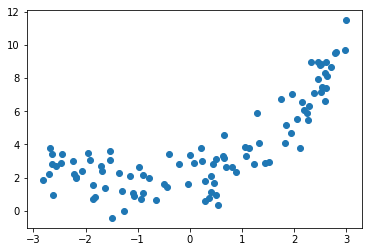

In [118]:
plt.scatter(X,y)
plt.show()

In [119]:
#增加新特征 X^2
from sklearn.preprocessing import PolynomialFeatures
#include_bias未True 就没有前面1那项
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-1.85684351]), array([-1.85684351,  3.44786782]))

In [120]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.8309509]), array([[0.98675793, 0.54449949]]))

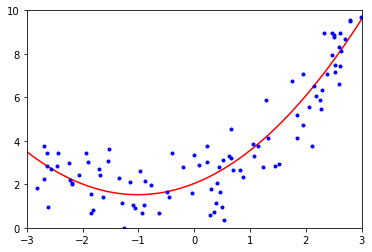

In [121]:
x_p = np.linspace(-3,3,100)
y_p = 0.501 * x_p ** 2 + 1.016 * x_p + 2.039
plt.plot(x_p,y_p,'r-')
plt.plot(X,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

## 学习曲线

In [237]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

In [238]:
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

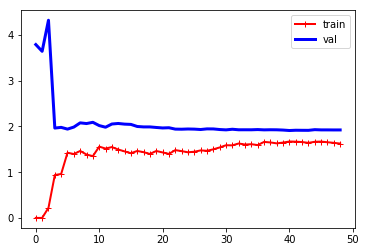

In [239]:
#每次运行结果不同,里面切分数据不固定,固定随机种子random_state结果不一定使我们想要的图
plot_learning_curves(lin_reg,X,y)

上面的曲线表现了一个典型的欠拟合模型，两条曲线都到达高原地带并趋于稳定，并且最后两条曲线非常接近，同时误差值非常大

首先，我们观察训练集的表现：当训练集只有一两个样本的时候，模型能够非常好的拟合它们，这也是为什么曲线是从零开始的原因。但是当加入了一些新的样本的时候，训练集上的拟合程度变得难以接受，出现这种情况有两个原因，一是因为数据中含有噪声，另一个是数据根本不是线性的。因此随着数据规模的增大，误差也会一直增大，直到达到高原地带并趋于稳定，在之后，继续加入新的样本，模型的平均误差不会变得更好或者更差。  

我们继续来看模型在验证集上的表现，当以非常少的样本去训练时，模型不能恰当的泛化，也就是为什么验证误差一开始是非常大的。当训练样本变多的到时候，模型学习的东西变多，验证误差开始缓慢的下降。但是一条直线不可能很好的拟合这些数据，因此最后误差会到达在一个高原地带并趋于稳定，最后和训练集的曲线非常接近